$X$ is a matrix in $\mathbb{R}^{N \times D}$.

$Y$ is  a matrix in $\mathbb{R}^{N \times 1}$.

$W$ is a matrix in $\mathbb{R}^{D \times M}$, the bias $b$ is a vector $\mathbb{R}^{M \times 1}$.

$V$ is a matrix $\mathbb{R}^{M \times 1}$, and the bias $c$ is $\mathbb{R}^{K \times 1}$

$$
z_j = \sigma\left( \Sigma_i w_{i,j} x_i + b_j \right) =
 \sigma\left( W_{j}^{T}x + b\right) 
$$
$$
z = \sigma\left( W^Tx + b\right)
$$
and

$$
p(y|x) = \sigma\left( \Sigma_j v_jz_j + c \right) = 
\sigma\left( v^Tz + c \right) 
$$

So that $x$ is a NxD matrix (D being the number of features).

$z$ is an NxM matrix (number of samples by hidden units per layer).

$Y = p(y|x)$ is an Nx1 matrix or NxK (K is the number of classes).

$W$ is DxM, $b$ is Mx1.
$v$ is Mx1, and $c$ is a scalar - 1x1.

$$
Z = \sigma\left( XW + b \right)
$$
$$
Y = \sigma\left( Zv + c \right)
$$

# Nonlinearities

* **Sigmoid:** $\sigma(x) = 1 / (1+e^{-x})$
* **Tanh:** $(e^x - e^{-x}) / (e^x + e^{-x})$
* **Rectifier Linear Unit:** $relu(x) = max(0,x)$

Any relationship between the Hyperbolic tangent and the Sigmoid functions?

# Logistic  Regression - Feedforward

$x_1$ and $x_2$ with wieghts $w_1$ and $w_2$.

$$
a = x_1 w_1 + x_2 w_2 + b
$$

$$
p(y|x) = \sigma(w^T x) = 1/ (1+ e^{-a})
$$

So, prediction $\hat{y} = round[ p(y|x) ]$

# Neural Network - Feedforward

$w(i,j)$ goes from $x(i)$ to $z(j)$.

$$
z_j = \sigma\left( \Sigma_i W_{ij} x_i + b \right)
$$

$v_j$ goes from $z_j$ to $y$,
$$
p(y|x) = \sigma\left( \Sigma_j v_j z_j + c \right)
$$

## Example

$$
x = [0,1]
$$
$$
w(1,1) = w(1,2) = w(2,1) = w(2,2) = 1
$$
$$
v(1) = v(2) = 1
$$
$$
b = c = 0
$$


$$z(1) = \sigma\left( 0*1 + 1*1 \right) = 0.731$$
$$z(2) = \sigma\left( 0*1 + 1*1 \right) = 0.731$$
$$ p(y|x) = \sigma\left( 0.731*1 + 0.731*1 \right) = 0.812$$

* Cost/Error is usually something to minimize.

* Objective function can be minimized/maximized

* Minimizing the negative log-likelihood (gradient descent) is the same as maximizing the log-likelihood (and likelihood) (gradient ascent).


$t_n$ is the target while $y_n$ is the probability.
$$
J = - \Sigma_{n=1}^{N} t_n \log (y_n) + (1-t_n) \log (1-y_n)
$$

Likelihood
$$
L = P(T|X,W)= \prod_{n=1}^{N} \prod_{k=1}^{K} y_{n,k}^{t_{n,k}}
$$

* Gradient descent $w = w - \eta \partial_{w} J$

* Gradient ascent $w = w + \eta \partial_{w} J$

# Feedforward in SlowMo

# Utility Functions

## Indicator Matrix (One hot encoding)

**Indicator(n,k) = 1 if Y(n)==k else 0**

In [1]:
def y2indicator(Y, K=10):  # K=10 for MNIST
    N = len(Y)
    Y = Y.astype(np.int32)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, Y[i]] = 1
    return ind

def py_y2indicator(Y, K=10):
    N = len(Y)
    Y = Y.astype(np.int32)
    ind = np.zeros((N, K))
    ind[np.arange(N), Y] = 1
    return ind
    
def sk_y2indicator(Y, K=10):
    from sklearn.preprocessing import LabelBinarizer
    lb = LabelBinarizer()
    lb.fit(range(Y.max()+1))
    return lb.transform(Y)

In [2]:
# prediction_labels = np.argmax(softmax_outputs, axis=1)
# target_labels = np.argmax(indicator_matrix, axis=1)
# accuracy = sum(prediction_labels == target_labels)

# Y = np.argmax(y2indicator(Y), axis=1)

In [3]:
# determine the classification rate
# num correct / num total
def classification_rate(Y, P):
    return np.mean(predictions != T)

def classification_rate(Y, P):
    n_correct = 0
    n_total = 0
    for i in range(len(Y)):
        n_total += 1
        if Y[i] == P[i]:
            n_correct += 1
    return float(n_correct) / n_total

# Feedforward - Making predictions

(500, 2) (1500, 2)


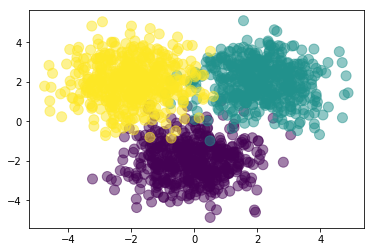

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Nclass = 500

X1 = np.random.randn(Nclass, 2) + np.array([0, -2])
X2 = np.random.randn(Nclass, 2) + np.array([2, 2])
X3 = np.random.randn(Nclass, 2) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)

print(X1.shape, X.shape)
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.show()

In [5]:
# randomly initialize weights
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)

In [6]:
def sigmoid(a):
    return 1 / (1 + np.exp(-a))

def forward(X, W1, b1, W2, b2):
    Z = sigmoid(X.dot(W1) + b1)
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True) # sum along the rows
    return Y # indicator like shape

In [7]:
P_Y_given_X = forward(X, W1, b1, W2, b2)
P = np.argmax(P_Y_given_X, axis=1) # predictions

# verify we chose the correct axis
assert(len(P) == len(Y))

print(P_Y_given_X.shape)
print("Classification rate for randomly chosen weights:", classification_rate(Y, P))

(1500, 3)
Classification rate for randomly chosen weights: 0.6366666666666667


# Backpropagation - Training

In [8]:
def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1] # H is (N, M)

    # # slow
    # ret1 = np.zeros((M, K))
    # for n in xrange(N):
    #     for m in xrange(M):
    #         for k in xrange(K):
    #             ret1[m,k] += (T[n,k] - Y[n,k])*Z[n,m]

    # # a bit faster - let's not loop over m
    # ret2 = np.zeros((M, K))
    # for n in xrange(N):
    #     for k in xrange(K):
    #         ret2[:,k] += (T[n,k]* - Y[n,k])*Z[n,:]

    # assert(np.abs(ret1 - ret2).sum() < 0.00001)

    # # even faster  - let's not loop over k either
    # ret3 = np.zeros((M, K))
    # for n in xrange(N): # slow way first
    #     ret3 += np.outer( Z[n], T[n] - Y[n] )

    # assert(np.abs(ret1 - ret3).sum() < 0.00001)

    # fastest - let's not loop over anything
    ret4 = Z.T.dot(T - Y)
    # assert(np.abs(ret1 - ret4).sum() < 0.00001)

    return ret4

def derivative_w1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape

    # slow way first
    # ret1 = np.zeros((X.shape[1], M))
    # for n in xrange(N):
    #     for k in xrange(K):
    #         for m in xrange(M):
    #             for d in xrange(D):
    #                 ret1[d,m] += (T[n,k] - Y[n,k])*W2[m,k]*Z[n,m]*(1 - Z[n,m])*X[n,d]

    # fastest
    dZ = (T - Y).dot(W2.T) * Z * (1 - Z)
    ret2 = X.T.dot(dZ)

    # assert(np.abs(ret1 - ret2).sum() < 0.00001)

    return ret2

def derivative_b2(T, Y):
    return (T - Y).sum(axis=0)


def derivative_b1(T, Y, W2, Z):
    return ((T - Y).dot(W2.T) * Z * (1 - Z)).sum(axis=0)


In [9]:
np.random.seed(1)

def forward(X, W1, b1, W2, b2):
    Z = 1 / (1 + np.exp(-X.dot(W1) - b1))
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA / expA.sum(axis=1, keepdims=True) # sum along the rows
    return Y, Z

def cost(T, Y):
    tot = T * np.log(Y)
    return tot.sum()

cost:-3147.181, classification_rate: 0.269
cost:-870.712, classification_rate: 0.787
cost:-688.900, classification_rate: 0.955
cost:-420.975, classification_rate: 0.971
cost:-287.407, classification_rate: 0.972
cost:-226.968, classification_rate: 0.973
cost:-194.475, classification_rate: 0.971
cost:-174.813, classification_rate: 0.971
cost:-161.884, classification_rate: 0.971
cost:-152.856, classification_rate: 0.971


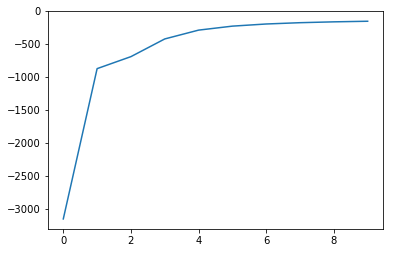

In [10]:
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
T = y2indicator(Y, K=K)


# randomly initialize weights
W1 = np.random.randn(D, M)
b1 = np.random.randn(M)
W2 = np.random.randn(M, K)
b2 = np.random.randn(K)


learning_rate = 10e-7
costs = []
for epoch in range(100000):
    output, hidden = forward(X, W1, b1, W2, b2)
    if epoch % 10000 == 0:
        c = cost(T, output)
        P = np.argmax(output, axis=1)
        r = classification_rate(Y, P)
        print("cost:{:.3f}, classification_rate: {:.3f}".format(c,r))
        costs.append(c)

    # this is gradient ASCENT, not DESCENT
    # be comfortable with both!
    # oldW2 = W2.copy()
    W2 += learning_rate * derivative_w2(hidden, T, output)
    b2 += learning_rate * derivative_b2(T, output)
    W1 += learning_rate * derivative_w1(X, hidden, T, output, W2)
    b1 += learning_rate * derivative_b1(T, output, W2, hidden)

plt.plot(costs)
plt.show()

# Tensorflow

In [11]:
import tensorflow as tf

In [12]:
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3]).astype(np.float32)

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
T = y2indicator(Y, K=K)

In [13]:
# tensor flow variables are not the same as regular Python variables
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))


def forward(X, W1, b1, W2, b2):
    Z = tf.nn.sigmoid(tf.matmul(X, W1) + b1)
    return tf.matmul(Z, W2) + b2


tfX = tf.placeholder(tf.float32, [None, D])
tfY = tf.placeholder(tf.float32, [None, K])

W1 = init_weights([D, M]) # create symbolic variables
b1 = init_weights([M])
W2 = init_weights([M, K])
b2 = init_weights([K])

logits = forward(tfX, W1, b1, W2, b2)

cost = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(
    labels=tfY,
    logits=logits
  )
) # compute costs
# WARNING: This op expects unscaled logits,
# since it performs a softmax on logits
# internally for efficiency.
# Do not call this op with the output of softmax,
# as it will produce incorrect results.

train_op = tf.train.GradientDescentOptimizer(0.05).minimize(cost) # construct an optimizer
# input parameter is the learning rate

predict_op = tf.argmax(logits, 1)
# input parameter is the axis on which to choose the max

# just stuff that has to be done
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(100000):
    sess.run(train_op, feed_dict={tfX: X, tfY: T})
    pred = sess.run(predict_op, feed_dict={tfX: X, tfY: T})
    if i % 10000 == 0:
        print("Accuracy:", np.mean(Y == pred))


Accuracy: 0.333333333333
Accuracy: 0.971333333333
Accuracy: 0.971333333333
Accuracy: 0.971333333333
Accuracy: 0.971333333333
Accuracy: 0.971333333333
Accuracy: 0.971333333333
Accuracy: 0.971333333333
Accuracy: 0.971333333333
Accuracy: 0.971333333333


# Sklearn

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle

In [16]:
Nclass = 500
D = 2 # dimensionality of input
M = 3 # hidden layer size
K = 3 # number of classes

X1 = np.random.randn(Nclass, D) + np.array([0, -2])
X2 = np.random.randn(Nclass, D) + np.array([2, 2])
X3 = np.random.randn(Nclass, D) + np.array([-2, 2])
X = np.vstack([X1, X2, X3])

Y = np.array([0]*Nclass + [1]*Nclass + [2]*Nclass)
T = y2indicator(Y, K=K)

X, Y = shuffle(X, Y)
Ntrain = int(0.7*len(X))
Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

In [21]:
# create the neural network
model = MLPClassifier(hidden_layer_sizes=(100, 50, 30), max_iter=10000)

# train the neural network
model.fit(Xtrain, Ytrain)

# print the train and test accuracy
train_accuracy = model.score(Xtrain, Ytrain)
test_accuracy = model.score(Xtest, Ytest)
print("train accuracy:", train_accuracy, "test accuracy:", test_accuracy)

train accuracy: 0.966666666667 test accuracy: 0.977777777778
